This notebook works through EDA on individual player level and play level data provided by the NFL Big Data Bowl Kaggle Competition. Spatial distributions along with probability density distributions are visualized to get a sense of the data.

#Load Packages

In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import itertools

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Inspect Positional Data

In [9]:
PlayState = pd.read_csv('/content/drive/MyDrive/DS5500/Phase 2/GameState.csv')
PlayState.tail()

,gameId,playId,x,y,s,a,dis,o,dir,nflId,position,team
260413,2018123015,4104,49.17,43.47,3.60,2.69,0.37,358.01,14.77,2553439,RB,home
260414,2018123015,4104,53.45,42.59,4.34,1.90,0.44,261.40,28.05,2557887,ILB,away
260415,2018123015,4104,37.07,29.67,3.62,4.15,0.38,178.41,287.74,2558009,FS,away
260416,2018123015,4104,62.77,37.83,5.99,4.82,0.60,185.03,149.55,2558856,WR,home
260417,2018123015,4104,38.15,24.36,4.37,2.20,0.44,NaN,NaN,0,NaN,football


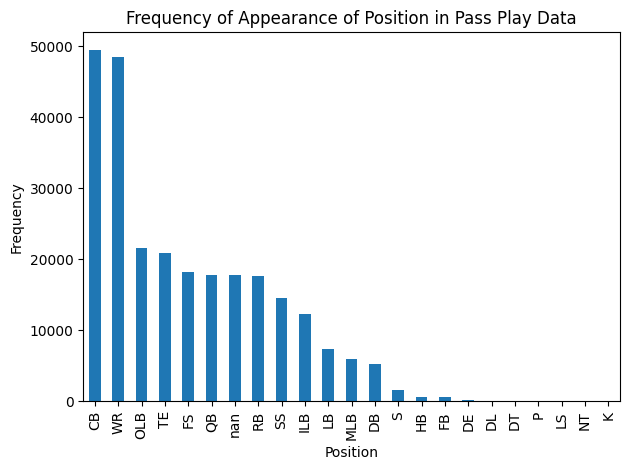

In [ ]:
# plot GameState.position histogram
PlayState.position.astype(str).value_counts(sort = True).plot(kind='bar')
plt.title("Frequency of Appearance of Position in Pass Play Data")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.tight_layout()

##Spatial Positions on Field

In [10]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(10, 5.5)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

Credit to Pradeep Muniasamy
https://www.kaggle.com/code/pradeepmuniasamy/extensive-eda-fe-models-on-nfl-big-data-bowl/notebook

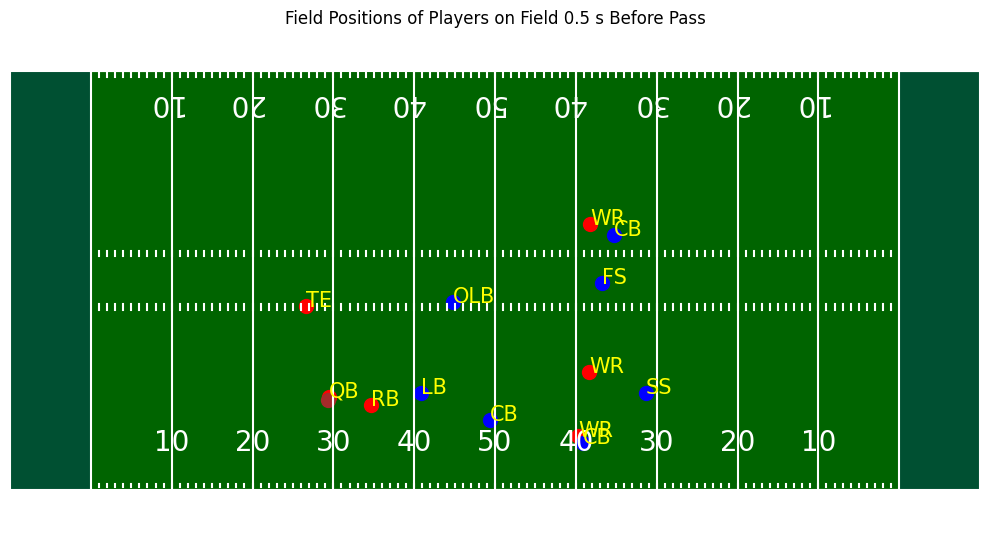

In [11]:
GameId = 2018090900 #@param {type:"raw"}
PlayId = 186 #@param {type:"raw"}

# example 2018123015 	4104
# example 2018090900  186

# pick specific play
singlePlay = PlayState[(PlayState.gameId == GameId) & (PlayState.playId == PlayId)]

# subset OFF v DEF
offensivePositions = ["QB", "RB", "WR", "TE", "FB", "HB"]
defensivePositions = ["LB", "CB", "DB", "FS", "SS", "S", "OLB", "MLB", "ILB"]

# create field
fig, ax = create_football_field()

# subset out and plot x, y positions as scatterplot over field
plt.scatter(singlePlay[singlePlay.position.isin(offensivePositions)]["x"],
            singlePlay[singlePlay.position.isin(offensivePositions)]["y"],
            c = 'red',
            s = 100)
plt.scatter(singlePlay[singlePlay.position.isin(defensivePositions)]["x"],
            singlePlay[singlePlay.position.isin(defensivePositions)]["y"],
            c = 'blue',
            s = 100)


# plot football
plt.scatter(singlePlay[singlePlay.team == 'football']['x'],
            singlePlay[singlePlay.team == 'football']['y'],
            c = 'brown', s = 100)

# add labels (including positions and reciever order), distances
for row in range(len(singlePlay)):
  if singlePlay.team.iloc[row] != 'football':
    plt.annotate(singlePlay.position.iloc[row],
                (singlePlay.x.iloc[row], singlePlay.y.iloc[row]),
                color = 'yellow',
                fontsize = 15)

plt.title("Field Positions of Players on Field 0.5 s Before Pass")
fig.tight_layout()
plt.show()

##Visualize Spatial Density on the Field

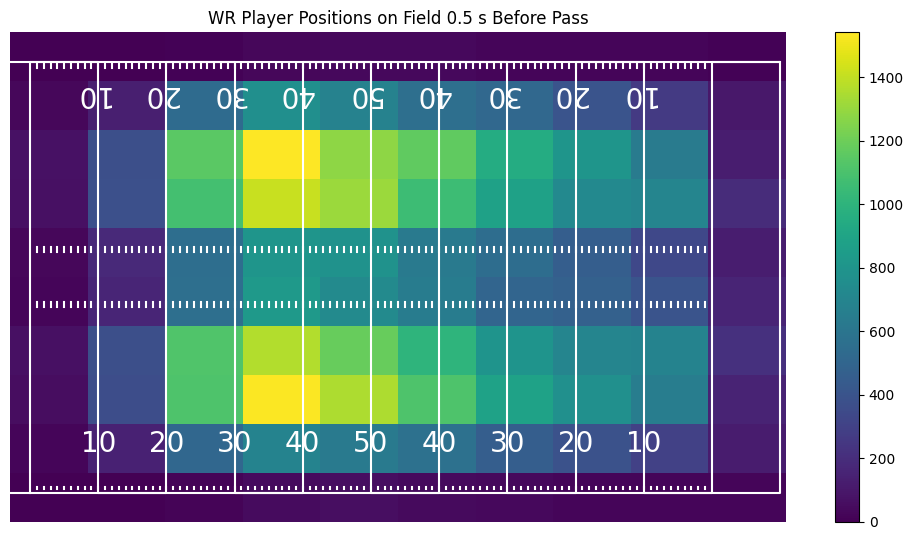

In [18]:
position = "WR" #@param ["ALL", "QB", "RB", "WR", "TE", "FB", "HB", "LB", "CB", "DB", "FS", "SS", "S", "OLB", "MLB", "ILB", "OFF", "DEF"]

offensivePositions = ["QB", "RB", "WR", "TE", "FB", "HB"]
defensivePositions = ["LB", "CB", "DB", "FS", "SS", "S", "OLB", "MLB", "ILB"]

fig, ax = create_football_field()

if position == "ALL":
  temp_df = PlayState[['x','y']]
elif position == "OFF":
  temp_df = PlayState[PlayState.position.isin(offensivePositions)][['x','y']]
elif position == "DEF":
  temp_df = PlayState[PlayState.position.isin(defensivePositions)][['x','y']]
else:
  temp_df = PlayState[PlayState.position == position][['x','y']]

plt.hist2d(temp_df["x"],temp_df["y"])
plt.colorbar()
plt.title(position + " Player Positions on Field 0.5 s Before Pass")
fig.tight_layout()
plt.show()

## Distributions of Player Movement Characteristics

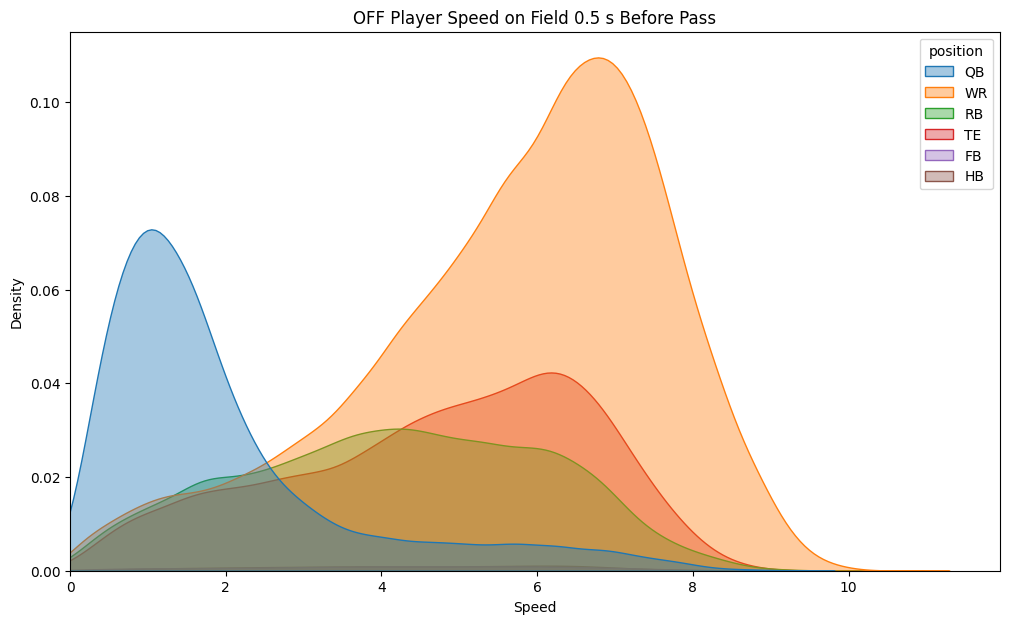

In [13]:
position = "OFF" #@param ["ALL", "QB", "RB", "WR", "TE", "FB", "HB", "LB", "CB", "DB", "FS", "SS", "S", "OLB", "MLB", "ILB", "OFF", "DEF"]
variable = "Speed" #@param ["Speed", "Acceleration", "Orientation", "Direction"]
byPosition = "y" #@param ["y", "n"]

varDict = {"Speed":'s',
           "Acceleration":'a',
           "Orientation":'o',
           "Direction":'dir'}

offensivePositions = ["QB", "RB", "WR", "TE", "FB", "HB"]
defensivePositions = ["LB", "CB", "DB", "FS", "SS", "S", "OLB", "MLB", "ILB"]

plt.figure(figsize=(12, 7))

if position == "ALL":
  temp_df = PlayState

  if byPosition == "y":
    sns.kdeplot(data = temp_df, x = varDict[variable], hue = "position", fill = True, alpha=0.4)

  elif byPosition == "n":
    sns.kdeplot(data = temp_df, x = varDict[variable], fill = True, alpha=0.4)

if position == "OFF":
  temp_df = PlayState[PlayState.position.isin(offensivePositions)]

  if byPosition == "y":
    sns.kdeplot(data = temp_df, x = varDict[variable], hue = "position", fill = True, alpha=0.4)

  elif byPosition == "n":
    sns.kdeplot(data = temp_df, x = varDict[variable], fill = True, alpha=0.4)

elif position == "DEF":
  temp_df = PlayState[PlayState.position.isin(defensivePositions)]

  if byPosition == "y":
    sns.kdeplot(data = temp_df, x = varDict[variable], hue = "position", fill = True, alpha=0.4)

  elif byPosition == "n":
    sns.kdeplot(data = temp_df, x = varDict[variable], fill = True, alpha=0.4)

else:
  temp_df = PlayState[PlayState.position == position]
  sns.kdeplot(data = temp_df, x = varDict[variable], fill = True, alpha=0.4)

plt.title(position + " Player " + variable + " on Field 0.5 s Before Pass")
plt.xlabel(variable)

if (variable == "Orientation") | (variable == "Direction"):
  plt.xlim(0, 360)
else:
  plt.xlim(0,)

fig.tight_layout()
plt.show()

#Inspect Play Feature Data

In [14]:
PlayFeatures = pd.read_csv("/content/drive/MyDrive/DS5500/Phase 2/fullPassPlayStates.csv")
PlayFeatures['trueTargetLabels'] = PlayFeatures.trueTargetLabels.astype(pd.Int64Dtype())
PlayFeatures['targetNflId'] = PlayFeatures.targetNflId.astype(pd.Int64Dtype())
PlayFeatures.head()

,gameId,playId,targetNflId,qb_features_nflId,qb_features_x,qb_features_y,qb_features_s,qb_features_a,qb_features_orient,qb_features_dir,target_0_nflId,target_0_x,target_0_y,target_0_s,target_0_a,target_0_o,target_0_dir,target_0_dir_orient_diff,target_0_qb_dist,target_0_qb_orient_diff,target_0_qb_dir_diff,target_0_closest_dist,target_0_closest_s,target_0_closest_a,target_0_closest_orient_diff,target_0_closest_dir_diff,target_0_closest_3_avg_dist,target_0_closest_3_max_s,target_0_closest_3_max_a,target_0_position,target_1_nflId,target_1_x,target_1_y,target_1_s,target_1_a,target_1_o,target_1_dir,target_1_dir_orient_diff,target_1_qb_dist,target_1_qb_orient_diff,target_1_qb_dir_diff,target_1_closest_dist,target_1_closest_s,target_1_closest_a,target_1_closest_orient_diff,target_1_closest_dir_diff,target_1_closest_3_avg_dist,target_1_closest_3_max_s,target_1_closest_3_max_a,target_1_position,target_2_nflId,target_2_x,target_2_y,target_2_s,target_2_a,target_2_o,target_2_dir,target_2_dir_orient_diff,target_2_qb_dist,target_2_qb_orient_diff,target_2_qb_dir_diff,target_2_closest_dist,target_2_closest_s,target_2_closest_a,target_2_closest_orient_diff,target_2_closest_dir_diff,target_2_closest_3_avg_dist,target_2_closest_3_max_s,target_2_closest_3_max_a,target_2_position,target_3_nflId,target_3_x,target_3_y,target_3_s,target_3_a,target_3_o,target_3_dir,target_3_dir_orient_diff,target_3_qb_dist,target_3_qb_orient_diff,target_3_qb_dir_diff,target_3_closest_dist,target_3_closest_s,target_3_closest_a,target_3_closest_orient_diff,target_3_closest_dir_diff,target_3_closest_3_avg_dist,target_3_closest_3_max_s,target_3_closest_3_max_a,target_3_position,target_4_nflId,target_4_x,target_4_y,target_4_s,target_4_a,target_4_o,target_4_dir,target_4_dir_orient_diff,target_4_qb_dist,target_4_qb_orient_diff,target_4_qb_dir_diff,target_4_closest_dist,target_4_closest_s,target_4_closest_a,target_4_closest_orient_diff,target_4_closest_dir_diff,target_4_closest_3_avg_dist,target_4_closest_3_max_s,target_4_closest_3_max_a,target_4_position,target_5_nflId,target_5_x,target_5_y,target_5_s,target_5_a,target_5_o,target_5_dir,target_5_dir_orient_diff,target_5_qb_dist,target_5_qb_orient_diff,target_5_qb_dir_diff,target_5_closest_dist,target_5_closest_s,target_5_closest_a,target_5_closest_orient_diff,target_5_closest_dir_diff,target_5_closest_3_avg_dist,target_5_closest_3_max_s,target_5_closest_3_max_a,target_5_position,week,Time,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,trueTargetLabels
0,2018090600,75,2495454,310.0,23.74,26.853333,1.44,4.25,37.54,75.83,2543583.0,24.92,27.383333,3.70,3.87,294.66,296.70,2.04,1.293561,-257.12,-220.87,9.935819,3.29,2.98,-233.58,25.76,10.179599,3.29,3.44,RB,2559033.0,28.68,32.193333,6.05,0.72,231.62,215.54,16.08,7.274558,-194.08,-139.71,4.557477,2.76,2.29,-187.91,-7.07,7.688528,2.76,3.44,FB,2555415.0,33.85,31.793333,5.43,1.41,267.41,270.55,3.14,11.252364,-229.87,-194.72,1.726297,2.76,2.29,-223.70,-62.08,3.809690,2.76,3.44,TE,2533040.0,34.25,18.723333,5.79,2.84,265.07,262.10,2.97,13.287475,-227.53,-186.27,2.488453,3.72,3.45,-18.54,30.39,4.861545,3.72,3.45,WR,2495454.0,37.02,8.903333,6.21,3.04,279.62,275.90,3.72,22.328477,-242.08,-200.07,3.931272,5.34,0.76,-89.62,4.95,8.427943,5.34,3.45,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Night,(15:00) M.Ryan pass short right to J.Jones pus...,1.0,1.0,15.0,ATL,play_type_pass,ATL,20.0,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10.0,10.0,0.261827,False,4
1,2018090600,146,2560854,310.0,66.48,23.773333,1.77,3.62,30.44,84.49,2543583.0,64.21,25.503333,2.75,2.27,246.15,181.30,64.85,2.854085,-215.71,-96.81,9.952336,

In [15]:
PlayFeatures.shape

(19239, 158)

##Class Distribution

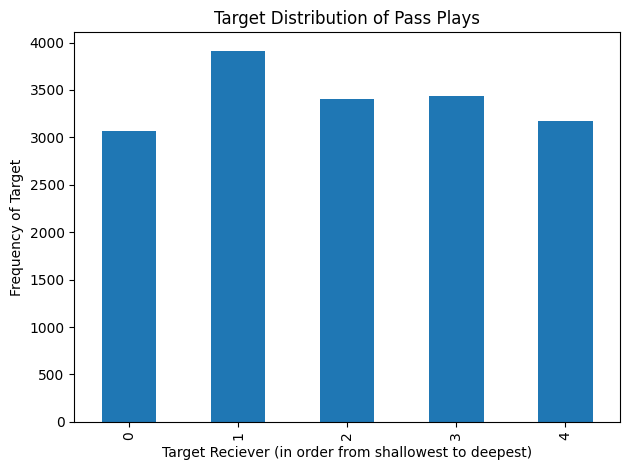

In [ ]:
PlayFeatures.trueTargetLabels.astype("category").value_counts(sort = True).reindex(index = [0, 1, 2, 3, 4]).plot(kind='bar')
plt.title("Target Distribution of Pass Plays")
plt.xlabel("Target Reciever (in order from shallowest to deepest)")
plt.ylabel("Frequency of Target")
plt.tight_layout()

##Feature Distributions by Target (class)

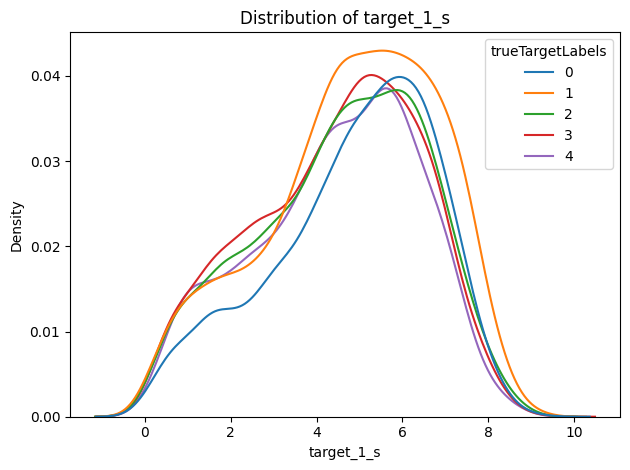

In [19]:
variable = "target_1_s" #@param {type:"string"}
byTarget = "y" #@param ["y", "n"]

# interesting "target_1_o"

if byTarget == "n":
  sns.kdeplot(PlayFeatures[variable])
elif byTarget  == "y":
  sns.kdeplot(PlayFeatures, x = variable, hue = PlayFeatures.trueTargetLabels.astype("category"))

plt.title("Distribution of " + variable)
plt.tight_layout()
plt.show()

#Final Data Clean for Model Ingestion

In [44]:
dummyFeatures = PlayFeatures[['target_0_position', 'target_1_position', 'target_2_position', 'target_3_position', 'target_4_position', 'Time']]
PlayFeatures = pd.concat([PlayFeatures, pd.get_dummies(dummyFeatures)], axis = 1)

In [45]:
PlayFeatures.trueTargetLabels = PlayFeatures.trueTargetLabels.astype('category')

In [46]:
toDrop = ['gameId',
          'playId',
          'qb_features_nflId',
          'targetNflId',
          'target_0_nflId',
          'target_1_nflId',
          'target_2_nflId',
          'target_3_nflId',
          'target_4_nflId',
          'target_5_nflId',
          'target_0_position',
          'target_1_position',
          'target_2_position',
          'target_3_position',
          'target_4_position',
          'target_5_position',
          'target_5_x',
          'target_5_y',
          'target_5_s',
          'target_5_a',
          'target_5_o',
          'target_5_dir',
          'target_5_dir_orient_diff',
          'target_5_qb_dist',
          'target_5_qb_orient_diff',
          'target_5_qb_dir_diff',
          'target_5_closest_dist',
          'target_5_closest_s',
          'target_5_closest_a',
          'target_5_closest_orient_diff',
          'target_5_closest_dir_diff',
          'target_5_closest_3_avg_dist',
          'target_5_closest_3_max_s',
          'target_5_closest_3_max_a',
          'target_5_position',
          'Time',
          'playDescription',
          'possessionTeam',
          'playType',
          'offenseFormation',
          'personnelO',
          'personnelD',
          'typeDropback',
          'gameClock',
          'yardlineSide',
          'penaltyCodes',
          'penaltyJerseyNumbers',
          'passResult',
          'offensePlayResult',
          'playResult',
          'epa',
          'isDefensivePI']

PlayFeatures.drop(toDrop, axis = 1, inplace = True)

In [47]:
# drop rows with NaNs
PlayFeatures.dropna(inplace = True)

In [48]:
# final shape
PlayFeatures.shape

(16446, 130)

In [49]:
PlayFeatures.head()

,qb_features_x,qb_features_y,qb_features_s,qb_features_a,qb_features_orient,qb_features_dir,target_0_x,target_0_y,target_0_s,target_0_a,target_0_o,target_0_dir,target_0_dir_orient_diff,target_0_qb_dist,target_0_qb_orient_diff,target_0_qb_dir_diff,target_0_closest_dist,target_0_closest_s,target_0_closest_a,target_0_closest_orient_diff,target_0_closest_dir_diff,target_0_closest_3_avg_dist,target_0_closest_3_max_s,target_0_closest_3_max_a,target_1_x,target_1_y,target_1_s,target_1_a,target_1_o,target_1_dir,target_1_dir_orient_diff,target_1_qb_dist,target_1_qb_orient_diff,target_1_qb_dir_diff,target_1_closest_dist,target_1_closest_s,target_1_closest_a,target_1_closest_orient_diff,target_1_closest_dir_diff,target_1_closest_3_avg_dist,target_1_closest_3_max_s,target_1_closest_3_max_a,target_2_x,target_2_y,target_2_s,target_2_a,target_2_o,target_2_dir,target_2_dir_orient_diff,target_2_qb_dist,target_2_qb_orient_diff,target_2_qb_dir_diff,target_2_closest_dist,target_2_closest_s,target_2_closest_a,target_2_closest_orient_diff,target_2_closest_dir_diff,target_2_closest_3_avg_dist,target_2_closest_3_max_s,target_2_closest_3_max_a,target_3_x,target_3_y,target_3_s,target_3_a,target_3_o,target_3_dir,target_3_dir_orient_diff,target_3_qb_dist,target_3_qb_orient_diff,target_3_qb_dir_diff,target_3_closest_dist,target_3_closest_s,target_3_closest_a,target_3_closest_orient_diff,target_3_closest_dir_diff,target_3_closest_3_avg_dist,target_3_closest_3_max_s,target_3_closest_3_max_a,target_4_x,target_4_y,target_4_s,target_4_a,target_4_o,target_4_dir,target_4_dir_orient_diff,target_4_qb_dist,target_4_qb_orient_diff,target_4_qb_dir_diff,target_4_closest_dist,target_4_closest_s,target_4_closest_a,target_4_closest_orient_diff,target_4_closest_dir_diff,target_4_closest_3_avg_dist,target_4_closest_3_max_s,target_4_closest_3_max_a,week,Time,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,trueTargetLabels,target_0_position_FB,target_0_position_RB,target_0_position_TE,target_0_position_WR,target_1_position_FB,target_1_position_RB,target_1_position_TE,target_1_position_WR,target_2_position_FB,target_2_position_RB,target_2_position_TE,target_2_position_WR,target_3_position_FB,target_3_position_RB,target_3_position_TE,target_3_position_WR,target_4_position_FB,target_4_position_RB,target_4_position_TE,target_4_position_WR,Time_Day,Time_Night
0,23.74,26.853333,1.44,4.25,37.54,75.83,24.92,27.383333,3.70,3.87,294.66,296.70,2.04,1.293561,-257.12,-220.87,9.935819,3.29,2.98,-233.58,25.76,10.179599,3.29,3.44,28.68,32.193333,6.05,0.72,231.62,215.54,16.08,7.274558,-194.08,-139.71,4.557477,2.76,2.29,-187.91,-7.07,7.688528,2.76,3.44,33.85,31.793333,5.43,1.41,267.41,270.55,3.14,11.252364,-229.87,-194.72,1.726297,2.76,2.29,-223.70,-62.08,3.809690,2.76,3.44,34.25,18.723333,5.79,2.84,265.07,262.10,2.97,13.287475,-227.53,-186.27,2.488453,3.72,3.45,-18.54,30.39,4.861545,3.72,3.45,37.02,8.903333,6.21,3.04,279.62,275.90,3.72,22.328477,-242.08,-200.07,3.931272,5.34,0.76,-89.62,4.95,8.427943,5.34,3.45,1.0,Night,1.0,1.0,15.0,20.0,7.0,4.0,0.0,0.0,90.0,4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,66.48,23.773333,1.77,3.62,30.44,84.49,64.21,25.503333,2.75,2.27,246.15,181.30,64.85,2.854085,-215.71,-96.81,9.952336,2.88,1.51,-181.61,167.65,11.974993,3.97,2.55,71.13,14.433333,6.31,0.80,6.08,335.05,328.97,10.433509,24.36,-250.56,2.243769,3.97,2.14,75.46,21.90,6.393572,3.97,3.90,72.80,28.213333,4.76,3.75,302.54,324.44,21.90,7.723730,-272.10,-239.95,1.108873,2.88,1.51,-238.00,24.51,7.189092,3.97,2.55,73.01,15.973333,3.71,0.62,213.95,250.50,36.55,10.172556,-183.51,-166.01,1.455232,3.97,2.14,-132.41,106.45,4.902522,3.97,3.90,74.52,43.493333,6.17,1.67,281.86,268.85,13.01,21.296009,-251.42,-184.36,5.877772,3.14,1.47,-227.86,-7.60,13.976586,3.14,2.55,1.0,Night,1.0,1.0,10.0,39.0,7.0,4.0,0.0,0.0,49.0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,65.30,23.893333,1.46,1.93,276.71,145.51,67.44,21.403333,5.28,1.61

In [50]:
# save CSV
PlayFeatures.to_csv("/content/drive/MyDrive/DS5500/Phase 2/PlayFeaturesForModels_12July23.csv")